In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_files = os.listdir()
files_postfix = "_results.csv"
result_files = [f for f in all_files if f.endswith(files_postfix)]
result_files

['graphafold_results.csv',
 'sincfold_results.csv',
 'ufold_results.csv',
 'spotrna_results.csv']

Read all

In [2]:
all_dfs = {}
for f in result_files:
    df = pd.read_csv(f)
    all_dfs[f] = df
all_dfs

{'graphafold_results.csv':      PDB  Precision  Recall    F1   INF
 0   7PTK       0.92    0.88  0.90  0.90
 1   7PTL       0.96    0.83  0.89  0.90
 2   7YR6       0.75    0.90  0.82  0.82
 3   7YR7       0.61    0.64  0.62  0.62
 4   7ZJ4       0.85    0.65  0.74  0.74
 5   8BTZ       1.00    1.00  1.00  1.00
 6   8FZA       0.67    0.59  0.63  0.63
 7   8S95       0.90    0.75  0.82  0.82
 8   8TVZ       0.95    0.78  0.86  0.86
 9   8UO6       0.83    0.80  0.82  0.82
 10  8UYE       0.92    0.67  0.77  0.78
 11  8UYG       0.67    0.29  0.40  0.44
 12  8UYJ       0.78    0.58  0.67  0.67
 13  8UYS       1.00    0.87  0.93  0.93
 14  9B0L       0.40    0.25  0.31  0.32
 15  9BZ1       0.74    1.00  0.85  0.86
 16  9BZC       0.75    1.00  0.86  0.87,
 'sincfold_results.csv':      PDB  Precision  Recall    F1   INF
 0   7QR3       0.00    0.00  0.00  0.00
 1   7QR4       0.00    0.00  0.00  0.00
 2   7YR6       0.00    0.00  0.00  0.00
 3   7YR7       0.00    0.00  0.00  0.00
 4   7

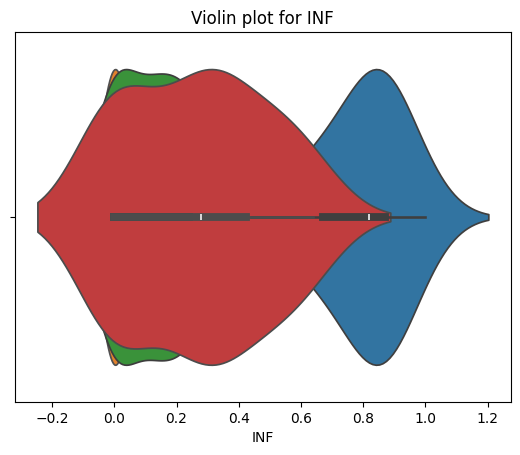

In [3]:
# make a violin plot
def plot_violin(df, column, title):
    sns.violinplot(x=column, data=df).set_title(title)

# plot all the dataframes
for f in result_files:
    df = all_dfs[f]
    # get the column name from the file name
    column = 'INF'
    title = f"Violin plot for {column}"
    plot_violin(df, column, title)

In [4]:
results=[]
methods = {
    "graphafold_results.csv": "GraphaFold",
    "spotrna_results.csv": "SPOT-RNA",
    "sincfold_results.csv": "SincFold",
    "ufold_results.csv": "Ufold",
}
for method, df in all_dfs.items():
    m = methods[method]
    melted_df = df.melt(var_name='Metric', value_name="Value")
    melted_df["Method"] = m
    results.append(melted_df)




# Step 2: Concatenate into a single DataFrame
combined_df = pd.concat(results, ignore_index=True)
# drop rows where Metric is not INF
combined_df = combined_df[combined_df["Metric"] == "INF"]

combined_df

,Metric,Value,Method
68,INF,0.9,GraphaFold
69,INF,0.9,GraphaFold
70,INF,0.82,GraphaFold
71,INF,0.62,GraphaFold
72,INF,0.74,GraphaFold
...,...,...,...
345,INF,0.0,SPOT-RNA
346,INF,0.5,SPOT-RNA
347,INF,0.28,SPOT-RNA
348,INF,0.39,SPOT-RNA


In [8]:
# sort by method, GraphaFold first and the rest in alphabetical order
combined_df["Method"] = pd.Categorical(combined_df["Method"], categories=["GraphaFold", "SincFold", "SPOT-RNA", "Ufold"], ordered=True)

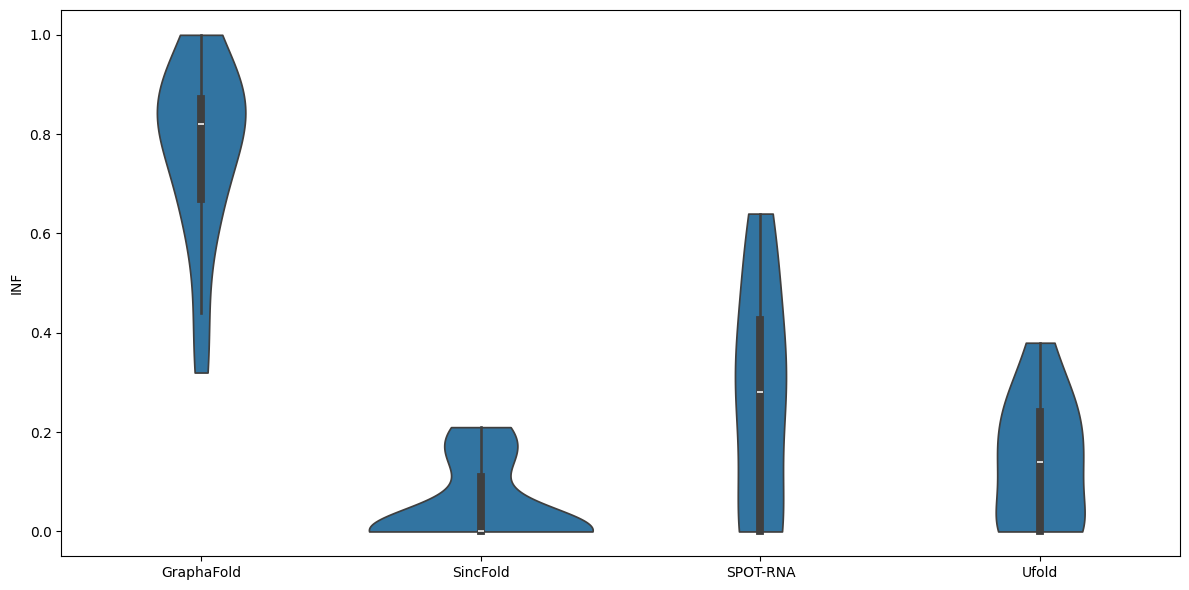

In [9]:
# # Step 3: Plot using seaborn
plt.figure(figsize=(12, 6))
sns.violinplot(data=combined_df, x="Method", y="Value", inner='box', native_scale=True, cut=0)  # or dodge=True
# change x and y axis labels
plt.xlabel(None)
plt.ylabel("INF")
# plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [12]:
# combine all dataframes from all_dfs into a single dataframe. Merge by coulumns (i.e. values are columns)
df = pd.concat(all_dfs.values(), axis=1)
df.head()



,PDB,Precision,Recall,F1,INF,PDB,Precision,Recall,F1,INF,PDB,Precision,Recall,F1,INF,PDB,Precision,Recall,F1,INF
0,7PTK,0.92,0.88,0.90,0.90,7QR3,0.00,0.00,0.00,0.00,7QR3,0.00,0.00,0.00,0.00,7PTK,0.44,0.49,0.46,0.46
1,7PTL,0.96,0.83,0.89,0.90,7QR4,0.00,0.00,0.00,0.00,7QR4,0.00,0.00,0.00,0.00,7PTL,0.27,0.41,0.33,0.33
2,7YR6,0.75,0.90,0.82,0.82,7YR6,0.00,0.00,0.00,0.00,7YR6,0.00,0.00,0.00,0.00,7QR3,0.00,0.00,0.00,0.00
3,7YR7,0.61,0.64,0.62,0.62,7YR7,0.00,0.00,0.00,0.00,7YR7,0.38,0.17,0.23,0.25,7QR4,0.00,0.00,0.00,0.00
4,7ZJ4,0.85,0.65,0.74,0.74,7ZJ4,0.06,0.02,0.03,0.03,7ZJ4,0.29,0.17,0.22,0.22,7YR6,0.00,0.00,0.00,0.00
